# Aula 12 - Regressão Logística

**Objetivo**: Aprender o que é Regressão Logística e Regressão Softmax. Introduzir o aluno aos problemas de classificação de aprendizagem de máquina.

## Defininição - Regressão Logística

> Uma regressão logística se comporta exatamente como um modelo linear: faz uma predição simplesmente computando uma soma ponderada dos atributos (*features*), mais uma constante chamada viés (*bias*), também chamado de constante (*intercept*). Porém ao invés de retornar um valor contínuo, como a regressão linear, retorna a função logística desse valor.

$$\operatorname{Logística}(x) = \frac{1}{1 + e^{(-x)}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

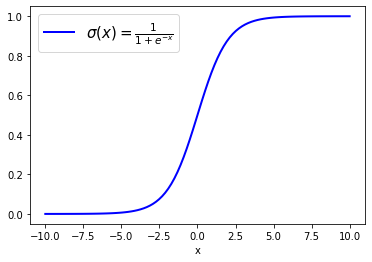

In [2]:
x = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-x))
plt.plot(x, sig, "b-", linewidth=2, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
plt.xlabel("x")
plt.legend(loc="upper left", fontsize=15)
plt.show()

$$ \operatorname{Linear} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots \theta_n x_n$$

$\operatorname{Linear}$ - regressão linear

$\theta$ - parâmetro do modelo

$n$ - número de atributos (*features*)

$x_i$ - o valor do *inésimo* atributo (*feature*)

$ \hat{p} = \sigma(\operatorname{Linear}) = \frac{1}{1 + e^{-\operatorname{Linear}}}$

$\hat{p}$ - probabilidade prevista da observação ser 1

$\hat{y}=\left\{\begin{array}{ll} 0 & \text { se } \hat{p} < 0.5 \\ 1 & \text { se } \hat{p} \geq 0.5 \end{array}\right.$

### Exemplo

$\mathrm{Previsão~de~Morte} = \sigma \big(-10 + 10\times \mathrm{cancer} + 12 \times \mathrm{diabetes} + 8 \times \mathrm{obesidade} \big)$

## Métricas de Desempenho de uma Regressão Logística

### MSE (?)
$$MSE = \frac{1}{m}\Sigma_{i=1}^{m}{(\hat{y}_i - y_i)^2}$$
Nossa predição agora é não-linear (devido à transformação logística). Se nós elevarmos essa predição ao quadrado (como fazemos em MSE) resulta em uma função não convexa e com muitos local minima, portanto, inviabilizando o Método do Gradiente Descendente.

### *Log Loss* 

Se divide em duas métricas de desempenho

$$Log~Loss=\left\{\begin{array}{ll} -\log(\hat{p}) & \text { se } y = 1 \\ -\log(1 - \hat{p}) & \text { se } y = 0 \end{array}\right.$$

Faz sentido porque:

* $- \log(\hat{p})$ se torna grande quando $\hat{p}$ se aproxima de 0 - Erro vai ser grande quando o modelo prevê $\hat{p} \approx 0$ mas $y = 1$
* $- \log(1 - \hat{p})$ se torna grande quando $1- \hat{p}$ se aproxima de 0 - Erro vai ser grande quando o modelo prevê $\hat{p} \approx 1$ mas $y = 0$

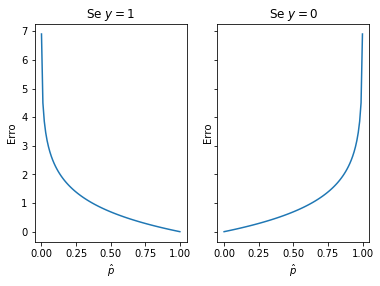

In [3]:
fig,ax = plt.subplots(1,2, sharey=True)

x = np.linspace(0.001, 0.999, 100)  # evitar erros pq log(0) é inf e log(1) é 0
ax[0].plot(x, -np.log(x))
ax[0].set_title('Se $y=1$')
ax[0].set_xlabel('$\hat{p}$')
ax[0].set_ylabel('Erro')

ax[1].plot(x, -np.log(1-x))
ax[1].set_title('Se $y=0$')
ax[1].set_xlabel('$\hat{p}$')
ax[1].set_ylabel('Erro')

plt.show()

### Para todo o dataset

$$Log~Loss = -\frac{1}{m} \sum_{i=1}^{m} \big[y^{(i)} \log (\hat{p}^{(i)}) + (1+y^{(i)}) \log (1-\hat{p}^{(i)}) \big]$$

## Exemplo com o Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

<img src="images/titanic.png" alt="titanic" style="width: 500px;"/>

In [4]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

D:\Miniconda3\envs\tensorflow\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
X  # Numpy Array apenas com números

array([[ 3.    ,  0.    , 22.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    , 71.2833],
       [ 3.    ,  1.    , 26.    ,  7.925 ],
       ...,
       [ 1.    ,  1.    , 19.    , 30.    ],
       [ 1.    ,  0.    , 26.    , 30.    ],
       [ 3.    ,  0.    , 32.    ,  7.75  ]])

In [6]:
print('Nomes dos Atributos: ', feature_names, '\n')
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Nomes dos Atributos:  ['pclass', 'female', 'age', 'fare'] 

Tamanho de X:  (714, 4) 

Tamanho de y:  (714,) 



### Quebrando dataset em `train` e `test`

Usar a função do Scikit-Learn [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#### Argumentos:

* matriz a ser dividida - `X` ou `y`
* `test_size` - `float` ou `int` do tamanho do dataset de teste (padrão $0.25$)
* `train_size` - padrão `1 - test_size`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [8]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (535, 4) 

Tamanho de X_test:  (179, 4) 

Tamanho de y_train:  (535,) 

Tamanho de y_test:  (179,) 



### Regressão Logística
Usar a função do Scikit-Learn [`sklearn.linear_model.SGDClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

#### Argumentos:
* `loss` - `str`
    * Log Loss - `'log'`
* `max_iter` - `int` - Número máximo de iterações do *Gradient Descent*
* `tol` - Tolerância - Critério de parada de treino
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)
* `eta0` - `float` - Taxa de aprendizagem inicial
    * padrão `0.01`
* `learning_rate` - `str` - Taxa de aprendizagem
    * Constante - `'constant'`
    * Adapatativa - `'adaptive'`
* `n_iter_no_change` - `int` - Somente se usar Taxa de Aprendizagem Adaptativa

#### Retorna:
* Objeto `estimator` do Scikit-Learn

In [9]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log', learning_rate='constant', max_iter=10,
                   eta0=0.0001, verbose=1, tol=None, random_state=44)

### Classe `Estimators`

* `.fit()` - Treina o Modelo
    * `X`
    * `y`
* `.predict()` - Gera predições do modelo
    * `X`
* `.coef_` - Retorna os coeficientes do modelo ($\theta_i$)
* `.intercept_` - Retorna o viés/constante (*bias/intercept*) do modelo ($\theta_0$)

In [10]:
clf.fit(X_train, y_train)

-- Epoch 1
Norm: 0.03, NNZs: 4, Bias: -0.002108, T: 535, Avg. loss: 0.666095
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 4, Bias: -0.003694, T: 1070, Avg. loss: 0.658638
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 4, Bias: -0.004342, T: 1605, Avg. loss: 0.661976
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 4, Bias: -0.005417, T: 2140, Avg. loss: 0.657339
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 4, Bias: -0.007010, T: 2675, Avg. loss: 0.657739
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4, Bias: -0.007911, T: 3210, Avg. loss: 0.659592
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.07, NNZs: 4, Bias: -0.008929, T: 3745, Avg. loss: 0.650646
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.08, NNZs: 4, Bias: -0.009966, T: 4280, Avg. loss: 0.647157
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.09, NNZs: 4, Bias: -0.010984, T: 4815, Avg. loss: 0.645341
Total training time

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=10, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=44, shuffle=True,
              tol=None, validation_fraction=0.1, verbose=1, warm_start=False)

In [11]:
# Coeficientes do modelo
for feature, coef in zip(feature_names, clf.coef_[0].tolist()):
    print(f"{feature}: {round(coef,3)}")

# Constante do modelo
print(f"Constante: {clf.intercept_}")

pclass: -0.074
female: 0.056
age: -0.023
fare: 0.028
Constante: [-0.01188305]


### Acurácia do Modelo
Usar a função do Scikit-Learn [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Retorna um score de acurácia `float` entre $0$ e $1$

#### Argumentos
* `y_true`: Classes Verdadeiras
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)
* `y_pred`: Classes Previstas pelo Modelo
    * 2 classes: vetor (1-D)
    * Mais que 2 classes: matriz (2-D)

In [18]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.3

 ---------------------------

Acurácia de Teste: 0.42


## Expandindo para $k$ classes

Podemos usar Regressão Logística para mais de uma duas classes ($k > 2$)

### Função Softmax

Dado um vetor $\mathbf{x}$, a função Softmax computa um score $s_k(\mathbf{x})$ para cada classe $k$, então estima a probabilidade de cada classe.

$$\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{e^{s_k(\mathbf{x})}}{\sum_{j=1}^K e^{s_j(\mathbf{x})}}$$

* $K$ - número de classes
* $\mathbf{s}(\mathbf{x})$ - vetor contendo todos os scores de cada classe de uma observação $x$
* $\sigma(\mathbf{s}(\mathbf{x}))_k$ - a probabilidade estimada ($\hat{p}_k$) que a obsevação $x$ pertence a classe $k$, dado os scores de cada classe para $x$

### Regressão Softmax

Que nem a Regressão Logística, a Regressão Softmax prevê a classe com maior probabilidade estimada (que é simplesmente a classe com o maior score) 

$$\hat{y} = \max_k \sigma(\mathbf{s}(\mathbf{x}))_k = \max_k s_k(\mathbf{x})$$

### Regressão Softmax (Regressão Logística Multinomial)
Usar a função do Scikit-Learn [`sklearn.linear_model.Logistic Regression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Não possui opções de controle da taxa de aprendizagem do Método do Gradiente Descendente

#### Argumentos:
* `multi_class` - `str`
    * `'ovr'` - Binário ($k=2$)
    * `'multinominal'` - Multiclasses ($k > 2$)
    * `'auto'` - se baseia nas dimensões da `array` `y` que é passada no `.fit()`
* `max_iter` - `int` - Número máximo de iterações do *Gradient Descent*
* `tol` - Tolerância - Critério de parada de treino
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

#### Retorna:
* Objeto `estimator` do Scikit-Learn

#### O que muda da Regressão Logística?
Agora o meu $y$ é uma matriz (2-D) e não um vetor (1-D)

### Métrica de Desempenho de uma Regressão Softmax

**Cross Entropy**: Estender a Log Loss para mais que duas classes

$$Cross~Entropy = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^K y_k^{(i)} \log (\hat{p}_k^{(i)})$$

* $y_k^{(i)}$ é a probabilidade alvo que a observação $i$ pertence à classe $k$. De maneira geral, ou é $1$ ou $0$, dependendo de qual classe $i$ pertence.